In [1]:
 import os
 os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [2]:
!git clone https://github.com/levindabhi/ACGPN.git
%cd ACGPN

Cloning into 'ACGPN'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 161 (delta 20), reused 18 (delta 18), pack-reused 139
Receiving objects: 100% (161/161), 302.85 KiB | 7.21 MiB/s, done.
Resolving deltas: 100% (59/59), done.
/content/ACGPN


In [3]:
!pip install ninja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 108 kB 5.2 MB/s 


In [4]:
import gdown
import numpy as np
from PIL import Image
import IPython
import gdown
import os
import sys

from predict_pose import generate_pose_keypoints

In [6]:
!mkdir Data_preprocessing/test_color
!mkdir Data_preprocessing/test_colormask
!mkdir Data_preprocessing/test_edge
!mkdir Data_preprocessing/test_img
!mkdir Data_preprocessing/test_label
!mkdir Data_preprocessing/test_mask
!mkdir Data_preprocessing/test_pose
!mkdir inputs
!mkdir inputs/img
!mkdir inputs/cloth

In [7]:
%cd pose
!gdown --id 1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
%cd ..

/content/ACGPN/pose
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
To: /content/ACGPN/pose/pose_iter_440000.caffemodel
100% 209M/209M [00:02<00:00, 72.7MB/s]
/content/ACGPN


In [ ]:
url = 'https://drive.google.com/uc?id=1_4SLQNF8KyWO_RxMBXnYj_jVvgSpYYav'
output = 'human_seg.pth'
gdown.download(url, output, quiet=False)

In [10]:
%cd U-2-Net
!mkdir saved_models
!mkdir saved_models/u2net
!mkdir saved_models/u2netp
!gdown --id 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O saved_models/u2netp/u2netp.pth
!gdown --id 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ -O saved_models/u2net/u2net.pth
import u2net_load
import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')
%cd ..

/content/ACGPN/U-2-Net
mkdir: cannot create directory ‘saved_models’: File exists
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy
To: /content/ACGPN/U-2-Net/saved_models/u2netp/u2netp.pth
100% 4.68M/4.68M [00:00<00:00, 212MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ
To: /content/ACGPN/U-2-Net/saved_models/u2net/u2net.pth
100% 176M/176M [00:01<00:00, 159MB/s]
...load U2NEP---4.7 MB
/content/ACGPN


In [11]:
!mkdir checkpoints
gdown.download('https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx',output='checkpoints/ACGPN_checkpoints.zip', quiet=False)
%cd checkpoints
!unzip ACGPN_checkpoints
%cd ..

Downloading...
From: https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx
To: /content/ACGPN/checkpoints/ACGPN_checkpoints.zip
100%|██████████| 524M/524M [00:03<00:00, 173MB/s]


/content/ACGPN/checkpoints
Archive:  ACGPN_checkpoints.zip
   creating: label2city/
  inflating: label2city/latest_net_G.pth  
  inflating: label2city/latest_net_G1.pth  
  inflating: label2city/latest_net_G2.pth  
  inflating: label2city/latest_net_U.pth  
  inflating: label2city/opt.txt      
/content/ACGPN


In [64]:
%cd inputs/cloth
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/ACGPN/inputs/cloth


Saving 000012_1.jpg to 000012_1.jpg
/content/ACGPN/inputs
/content/ACGPN


In [55]:
import os, shutil
folder = 'inputs/img'
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [129]:
%cd inputs/img
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/ACGPN/inputs/img


Saving IMG-2509.jpg to IMG-2509.jpg
/content/ACGPN/inputs
/content/ACGPN


In [65]:
sorted(os.listdir('inputs/cloth'))

['000004_1.jpg', '000012_1.jpg']

In [155]:
cloth_name = '000248_1.png'
cloth_path = os.path.join('inputs/cloth', sorted(os.listdir('inputs/cloth'))[1])
cloth = Image.open(cloth_path)
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))

u2net_run.infer(u2net, 'Data_preprocessing/test_color', 'Data_preprocessing/test_edge')

Generating mask for: 000248_1.png
Saving output at Data_preprocessing/test_edge/000248_1.png


In [156]:
sorted(os.listdir('inputs/img'))

['IMG-2509.jpg',
 'Screenshot 2022-08-21 032535.jpg',
 'aabhaas1.jpg',
 'aabhaas3.jpg',
 'dikshi3.jpg',
 'elsa2.jpg',
 'shivangi2.jpg',
 'shivangi3.jpg']

In [164]:
import time

start_time = time.time()
img_name = '000001_1.png'
img_path = os.path.join('inputs/img', sorted(os.listdir('inputs/img'))[1])
img = Image.open(img_path)
img = img.resize((192,256), Image.BICUBIC)

img_path = os.path.join('Data_preprocessing/test_img', img_name)
img.save(img_path)
resize_time = time.time()
print('Resized image in {}s'.format(resize_time-start_time))

!python3 Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'atr' --model-restore 'human_seg.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'
parse_time = time.time()
print('Parsing generated in {}s'.format(parse_time-resize_time))

pose_path = os.path.join('Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
generate_pose_keypoints(img_path, pose_path)
pose_time = time.time()
print('Pose map generated in {}s'.format(pose_time-parse_time))

Resized image in 0.04060220718383789s
100% 1/1 [00:01<00:00,  1.80s/it]
Parsing generated in 7.918991804122925s
File saved at Data_preprocessing/test_pose/000001_1_keypoints.json
Pose map generated in 0.9686794281005859s


In [158]:
import numpy as np
import json
#pose_name = '/kaggle/input/tryon-testdata/Dataset/test_pose/000000_0_keypoints.json'
pose_name = './Data_preprocessing/test_pose/000001_1_keypoints.json'
with open(pose_name, 'r') as f:
     pose_label = json.load(f)
     pose_data = pose_label['people'][0]['pose_keypoints']
     pose_data = np.array(pose_data)
     pose_data = pose_data.reshape((-1,3))
print(pose_data)
print(len(pose_data))

[[4.59130435e+01 6.12173913e+01 8.44961584e-01]
 [8.34782609e+01 1.28000000e+02 4.64528680e-01]
 [3.33913043e+01 1.33565217e+02 3.69170845e-01]
 [2.08695652e+01 2.44869565e+02 2.46869475e-01]
 [1.66956522e+01 2.50434783e+02 5.53309321e-02]
 [1.37739130e+02 1.16869565e+02 3.86588246e-01]
 [1.62782609e+02 1.89217391e+02 3.75234276e-01]
 [1.75304348e+02 2.50434783e+02 1.94478810e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.59130435e+01 5.56521739e+01 5.59172869e-01]
 [5.84347826e+01 5.00869565e+01 7.26937473e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.18260870e+01 6.12173913e+01 7.38916755e-01]]
18


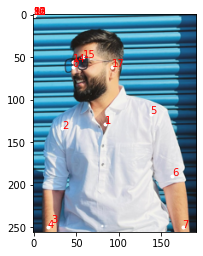

18


In [159]:
import matplotlib.pyplot as plt
img = plt.imread('./Data_preprocessing/test_img/000001_1.png')
plt.imshow(img)
i=0
for x,y,z in pose_data: 
    plt.plot(x, y, 'w.') # 'w.': color='white', marker='.'
    plt.text(x, y, str(i), color='r', fontsize=10)
    i+=1
plt.show()
print(i)

In [160]:
!rm -rf Data_preprocessing/test_pairs.txt
with open('Data_preprocessing/test_pairs.txt','w') as f:
    f.write('000001_1.png 000248_1.png')

In [161]:
!python test.py

?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/
display_winsize: 512
engine: None
export_onnx: None
fineSize: 512
gpu_ids: [0]
how_many: 1000
input_nc: 3
isTrain: False
label_nc: 20
loadSize: 512
max_dataset_size: inf
model: pix2pixHD
nThreads: 1
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_local_enhancers: 1
name: label2city
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
norm: instance
ntest: inf
onnx: None
output_nc: 3
phase: test
resize_or_crop: scale_width
results_dir: ./results/
serial_batches: True
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoader
dataset [AlignedDataset] was created
Data_preprocessing/test_label label
Data_preprocessing/test_img img
Data_preprocessing/tes

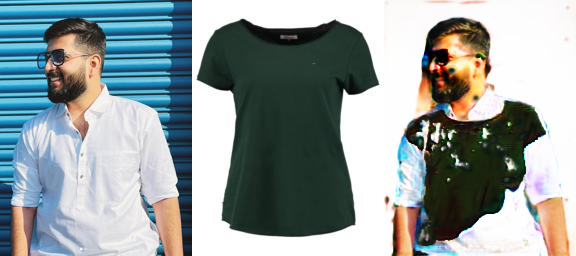

In [162]:
output_grid = np.concatenate([np.array(Image.open('Data_preprocessing/test_img/000001_1.png')),
                np.array(Image.open('Data_preprocessing/test_color/000248_1.png')),
                np.array(Image.open('results/test/try-on/000001_1.png'))], axis=1)
image_grid = Image.fromarray(output_grid)
image_grid